In [1]:
a=5
a

5

In [23]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split 

from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

from tensorflow.keras.optimizers import Adam


In [3]:
dataset=pd.read_csv(r"C:\Users\HP PC\Downloads\archive (12)\fer2013.csv")
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
a=5
a

5

C:\Users\HP PC\AppData\Local\Temp\ipykernel_12884\870180081.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)


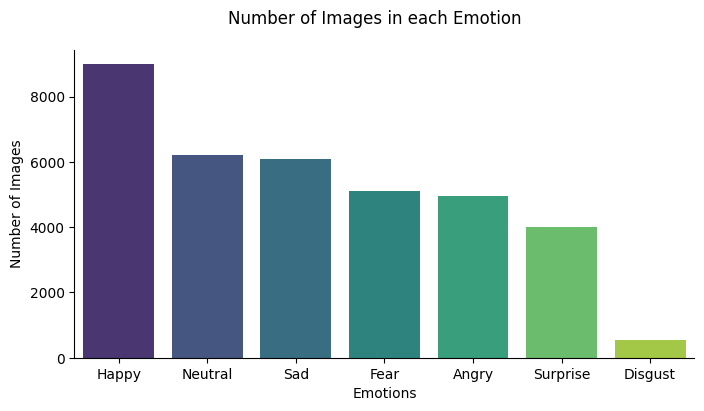

In [5]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = dataset.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

In [6]:
Classes=dataset["emotion"]
Classes

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [7]:
pixels = dataset["pixels"]

# Split the strings into lists of integers
pixels = pixels.apply(lambda x: np.fromstring(x, sep=' ', dtype=np.uint8))

# Convert the list of arrays into a 2D NumPy array of shape (35000, 48*48)
pixels = np.stack(pixels.values)

# Reshape into (35000, 48, 48) for image representation
pixels = pixels.reshape(-1, 48, 48)

In [8]:

pixels


array([[[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]],

       [[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]],

       [[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       ...,

       [[ 17,  17,  16, ...,  83, 114, 245],
        [ 18,  17,  16, ..., 104, 136, 253],
        [ 19,  16,  17, ..., 128, 152, 255

In [9]:
pixels=pixels/255
pixels

array([[[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157,
         0.16862745, 0.16078431],
        [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294,
         0.21960784, 0.16862745],
        [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471,
         0.2745098 , 0.18039216],
        [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627,
         0.42745098, 0.32156863]],

       [[0.59215686, 0.58823529, 0.57647059, ..., 0.50588235,
         0.54901961, 0.47058824],
        [0.59215686, 0.58431373, 0.58431373, ..., 0.47843137,
         0.55294118, 0.5372549 ],
        [0.59215686, 0.59215686, 0.61176471, ..., 0.42745098,
         0.48235294, 0.57254902],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.7

In [10]:
pixels=pixels.reshape(-1,48,48,1)
pixels.shape

(35887, 48, 48, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(pixels, Classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [12]:
X_train.shape

(29068, 48, 48, 1)

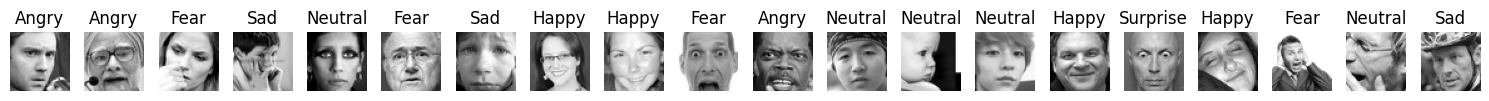

In [13]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_train[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_train[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [14]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%
train_datagen.fit(X_train)
valgen.fit(X_val)

In [15]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

<function matplotlib.pyplot.show(close=None, block=None)>

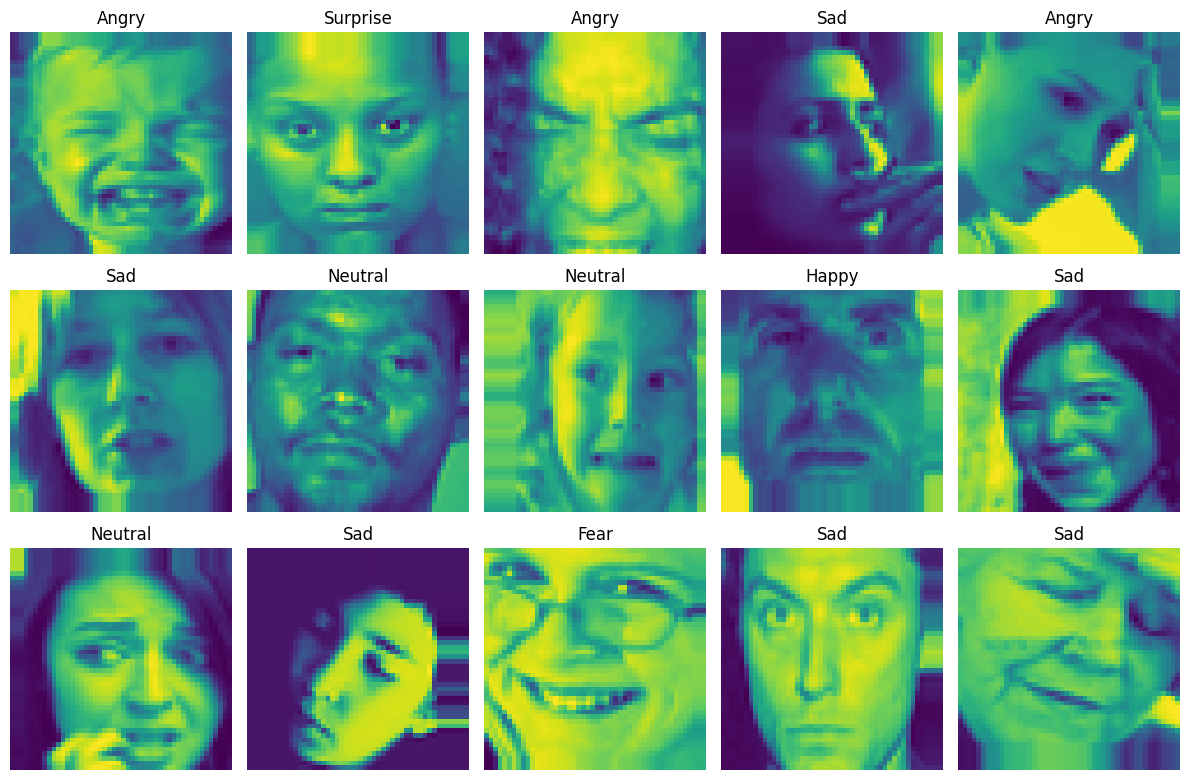

In [16]:
plt.figure(figsize=(12,8))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    index = Y_batch[i]
    plt.title(emotion_mapping[index])
    plt.axis('off') # turn off the axis numbering
    break
plt.tight_layout()
plt.show

In [47]:
input_shape=(48,48,1)

inputs=Input(input_shape)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3,3), activation="relu", padding='same')(x)
x=MaxPooling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x=Flatten()(x)
outputs=Dense(units=7,activation="linear")(x)

In [48]:
My_model=Model(inputs=inputs,outputs=outputs)

In [49]:
My_model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
My_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │          64,519 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,463 (271.34 KB)

 Trainable params: 69,463 (271.34 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
My_model.fit(
    train_generator,             # Training data generator
    epochs=20,                 # Number of epochs
    
    validation_data=validation_generator,   # Validation data generator
    
)

# Evaluating the model on the test set


Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.2695 - loss: 1.7857 - val_accuracy: 0.3495 - val_loss: 1.6755
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.3398 - loss: 1.6671 - val_accuracy: 0.3647 - val_loss: 1.6131
Epoch 3/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.3774 - loss: 1.6169 - val_accuracy: 0.3793 - val_loss: 1.5745
Epoch 4/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.3959 - loss: 1.5700 - val_accuracy: 0.4053 - val_loss: 1.5461
Epoch 5/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.4094 - loss: 1.5388 - val_accuracy: 0.4068 - val_loss: 1.5354
Epoch 6/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.4153 - loss: 1.5250 - val_accuracy: 0.4161 - val_loss: 1.5242
Epoch 7/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.4222 - loss: 1.4995 - val_accuracy: 0.4232 - val_loss: 1.4941
Epoch 8/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.4355 - loss: 1.4793 - 

In [51]:
X_test.shape

(3589, 48, 48, 1)

In [52]:
y_test.shape

(3589,)

In [53]:
y_test

32298    0
32299    5
32300    6
32301    4
32302    2
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 3589, dtype: int64

In [54]:
print(f"X_test shape is {X_test.shape} and Y_test shape is {y_test.shape}")

X_test shape is (3589, 48, 48, 1) and Y_test shape is (3589,)


In [55]:
y_pred=My_model.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [56]:
y_pred

array([[-0.10737533, -1.893804  , -0.55526894, ..., -1.0531869 ,
        -1.334001  , -0.13275407],
       [-0.04724414, -3.1060226 , -0.22653392, ...,  0.6804513 ,
        -2.0828755 , -0.17957279],
       [-2.781891  , -5.2925687 , -0.475913  , ..., -1.4125235 ,
        -1.998993  , -1.1817495 ],
       ...,
       [-1.205256  , -5.7133226 , -1.1400923 , ..., -0.7708358 ,
        -3.5483406 ,  0.04035909],
       [ 0.24750847, -3.2400765 , -1.5617232 , ..., -0.9798602 ,
        -5.0883865 , -1.8024788 ],
       [-0.8491416 , -4.0618105 , -1.0461504 , ..., -0.94985795,
        -3.7512758 ,  0.09270263]], dtype=float32)

In [57]:
y_pred_probs = tf.nn.softmax(y_pred)  # Convert logits to probabilities

# Get the predicted classes by taking the argmax along the classes axis
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print the predicted classes
print("Predicted classes:", y_pred_classes)

Predicted classes: [0 4 2 ... 6 0 6]


In [58]:
correct_predictions = np.sum(y_pred_classes == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5065


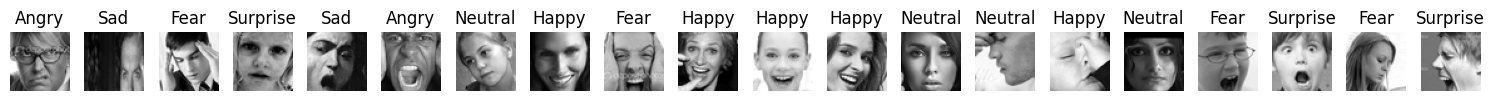

In [59]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_test[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_pred_classes[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()